# Data Exploration - Oticon Audio Explorers

In [75]:
from pathlib2 import Path

from collections import Counter

import numpy as np
import pandas as pd
from scipy.io import loadmat

import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# set seed
np.random.seed(42)

# plot style
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['lines.linewidth'] = 3
sns.set(font_scale=1.5)

### Load data

In [66]:
DATA_DIR = Path('../../data')

# Load npy-files
Xtrain  = np.load(DATA_DIR / 'raw/npy/training.npy')
ttrain  = np.load(DATA_DIR / 'raw/npy/training_labels.npy')
Xtest   = np.load(DATA_DIR / 'raw/npy/test.npy')

# Load matlab files
Xtrain_mat = loadmat(DATA_DIR / 'raw/mat/training.mat', squeeze_me=True)
ttrain_mat = loadmat(DATA_DIR / 'raw/mat/training_labels.mat', squeeze_me=True)
Xtest_mat = loadmat(DATA_DIR / 'raw/mat/test.mat', squeeze_me=True)

# Ensure no data difference
assert np.all(Xtrain_mat['data'] == Xtrain)
assert np.all(ttrain_mat['data'] == ttrain)
assert np.all(Xtest_mat['data'] == Xtest)

# Clean up
del Xtrain_mat
del ttrain_mat
del Xtest_mat

In [67]:
print(f"Xtrain: {Xtrain.shape}")
print(f"ttrain: {ttrain.shape}")
print(f"Xtest: {Xtest.shape}")

print(f"\nttrain in --> {np.unique(ttrain)}")

print(f"\nXtrain (min, max): {Xtrain.min(), Xtrain.max()}")
print(f"Xtest (min, max): {Xtest.min(), Xtest.max()}")

Xtrain: (52890, 32, 96)
ttrain: (52890,)
Xtest: (5347, 32, 96)

ttrain in --> [0 1 2 3 4]

Xtrain (min, max): (-80.0, 7.6293945e-06)
Xtest (min, max): (-80.0, 7.6293945e-06)


### Summary

In [137]:
N_train     = len(Xtrain)
N_test      = len(Xtest)
num_classes = len(np.unique(ttrain))

### ChatGPT background
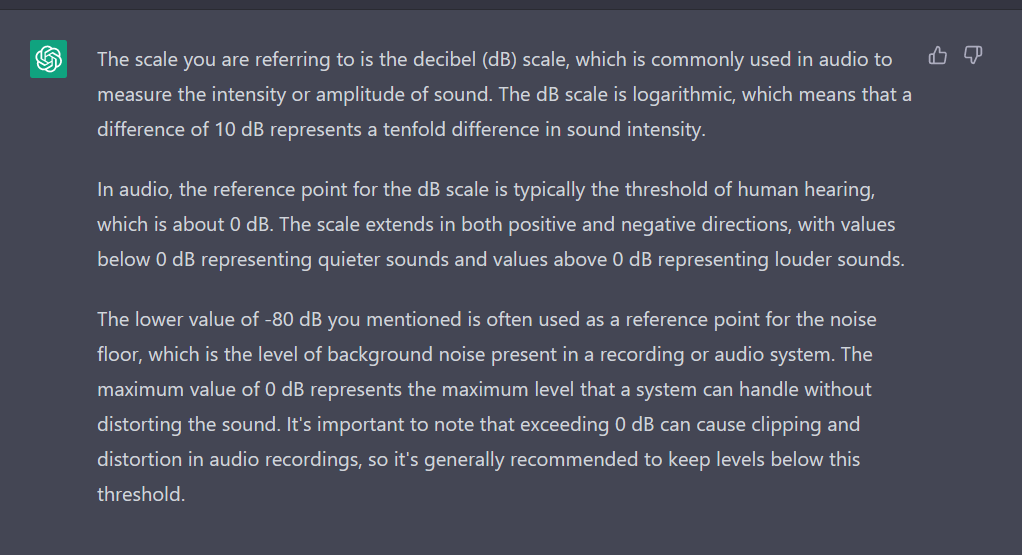

### Visualize label distribution


Label counts: {1: 27340, 0: 14530, 2: 4823, 3: 4412, 4: 1785}
Label frequencies: {1: 0.5169, 0: 0.2747, 2: 0.0912, 3: 0.0834, 4: 0.0337}


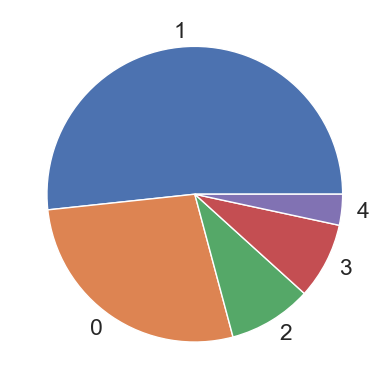

In [140]:
label_dist = Counter(ttrain)

label_counts = {k: v for k, v in label_dist.items()}
label_freqs = {k: round(v / N_train, 4) for k, v in label_dist.items()}

print(f"Label counts: {label_counts}")
print(f"Label frequencies: {label_freqs}")

plt.pie(x=label_dist.values(), labels=label_dist.keys())
plt.show()


### Visualize `Xtrain` and `Xtest`

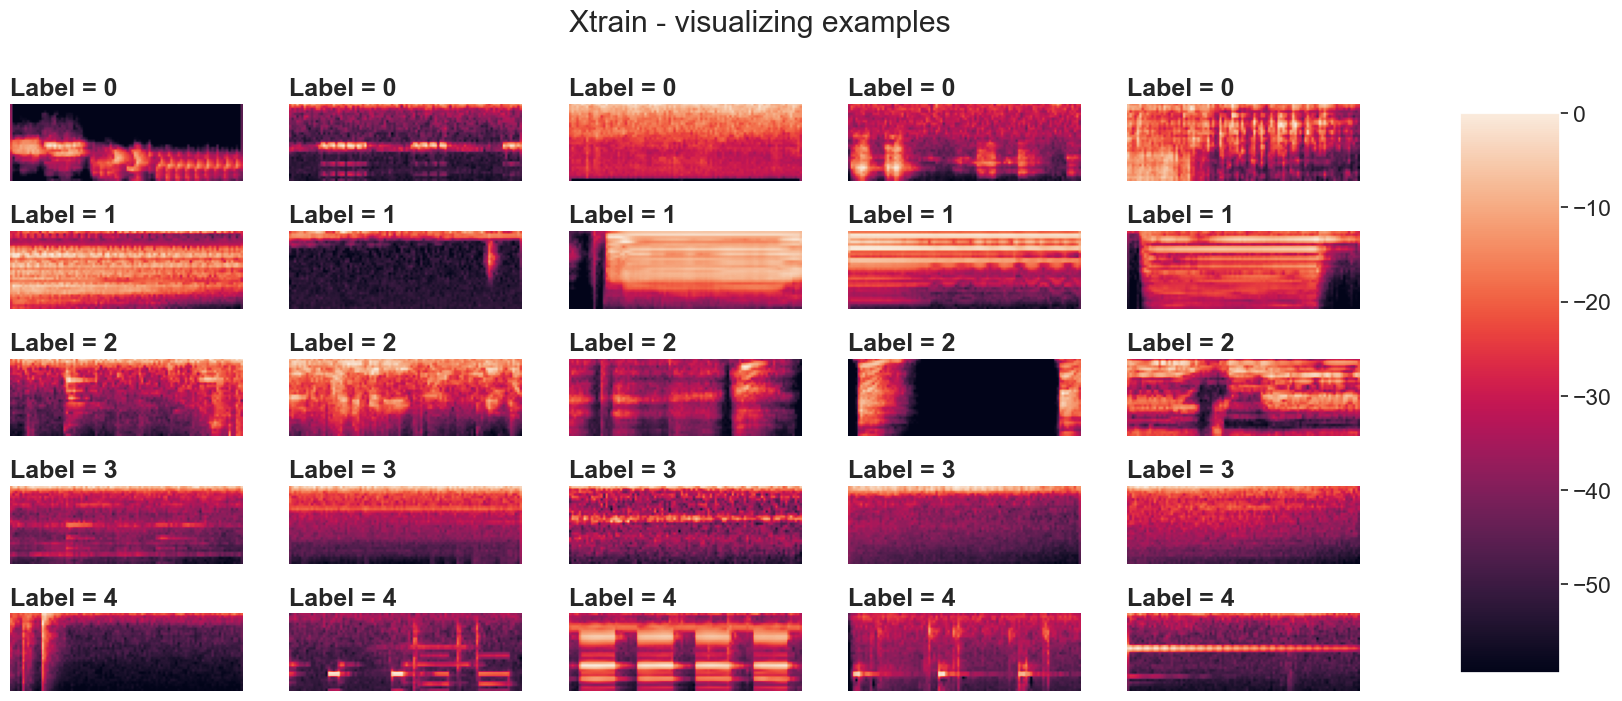

In [141]:
nrows, ncols = 5, 5

fig, axs = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(20, 8))
for i in range(nrows):
    for j in range(ncols):

        # Select class
        Xtrain_class = Xtrain[ttrain == i]
        ttrain_class = ttrain[ttrain == i]
        # Select data point
        idx = np.random.choice(len(Xtrain_class))
        # Show spectrogram
        im = axs[i, j].imshow(Xtrain_class[idx])
        axs[i, j].axis('off')
        # Add label to title
        axs[i, j].set_title(f"Label = {ttrain_class[idx]}", loc='left', weight='bold')

# Add colorbar for dB scale
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
fig.suptitle('Xtrain - visualizing examples')
plt.show()

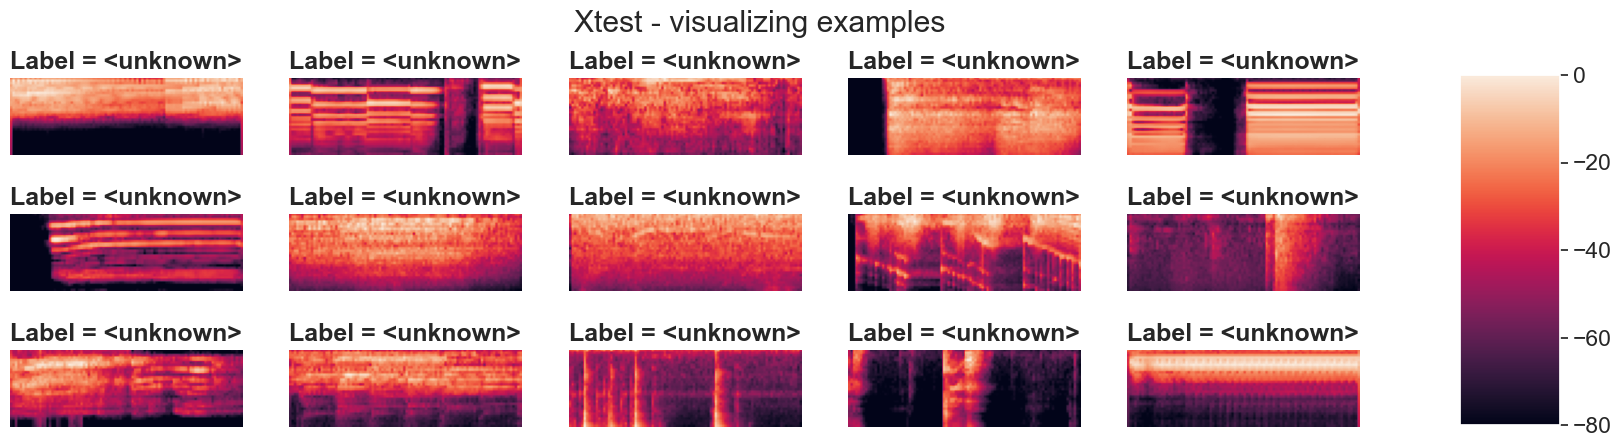

In [142]:
nrows, ncols = 3, 5

fig, axs = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(20, 5), squeeze=False)
for i in range(nrows):
    for j in range(ncols):

        # Select data point
        idx = np.random.choice(len(Xtest))
        # Show spectrogram
        im = axs[i, j].imshow(Xtest[idx])
        axs[i, j].axis('off')
        # Add label to title
        axs[i, j].set_title(f"Label = <unknown>", loc='left', weight='bold')

# Add colorbar for dB scale
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
fig.suptitle('Xtest - visualizing examples')
plt.show()

In [184]:
avg_spectrogram = [Xtrain[ttrain == i].mean(axis=0) for i in range(num_classes)]
std_spectrogram = [Xtrain[ttrain == i].std(axis=0) for i in range(num_classes)]

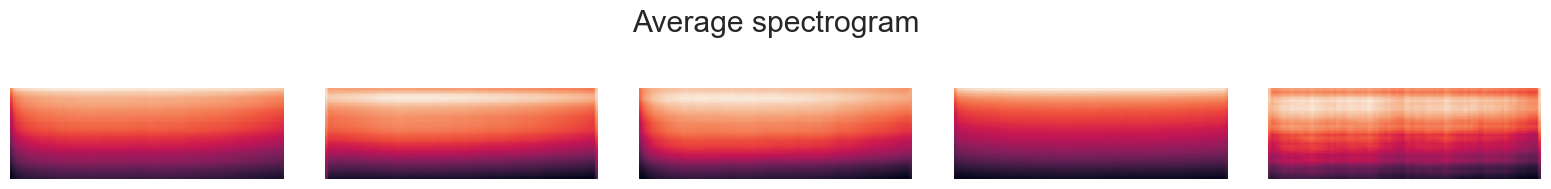

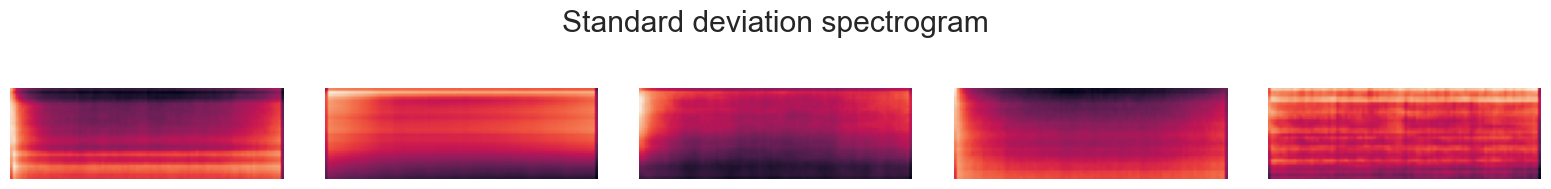

In [185]:
fig, axs = plt.subplots(1, num_classes, sharex=True, sharey=True, figsize=(16, 2))
for i in range(num_classes): 
    axs[i].imshow(avg_spectrogram[i])
    axs[i].axis('off')

fig.suptitle('Average spectrogram')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, num_classes, sharex=True, sharey=True, figsize=(16, 2))
for i in range(num_classes): 
    axs[i].imshow(std_spectrogram[i])
    axs[i].axis('off')

fig.suptitle('Standard deviation spectrogram')
plt.tight_layout()
plt.show()